In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma
import cmocean
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
buoyfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc'
wfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_vovecrtz_filt-n80-f0.0125.nc'
mldfile = database + 'MXL/NATL60-CJM165_y2013m03d01.1d_somxl010.nc'
maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'

In [4]:
dep=xr.open_dataset(buoyfile)['deptht']

In [5]:
#box n Box_1  indices =  695 1295 236 993
# minibox1 indices = 695 755 236 296

buoy_minibox1 = xr.open_dataset(buoyfile)['sobuoy'][:,:,236:297,695:756]
w_minibox1 = xr.open_dataset(wfile)['vovecrtz'][:,:,236:297,695:756]
tmask_minibox1 = xr.open_dataset(maskfile)['tmask'][:,:,236:297,695:756]
wmask_minibox1 = xr.open_dataset(maskfile)['fmask'][:,:,236:297,695:756]
mld_minibox1 = xr.open_dataset(mldfile)['somxl010'][:,236:297,695:756,]


In [15]:
buoy_minibox1_mask=ma.masked_where(tmask_minibox1 == 0, buoy_minibox1)
w_minibox1_mask=ma.masked_where(wmask_minibox1 == 0, w_minibox1)
avg_wb_minibox1=np.ones(len(dep))
for k in np.arange(len(dep)):
    avg_wb_minibox1[k] = np.nanmean(buoy_minibox1_mask[0,k,:,:]*w_minibox1_mask[0,k,:,:])

avg_mld_minibox1=np.nanmean(mld_minibox1)

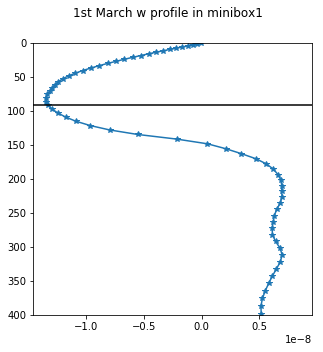

In [16]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.suptitle('1st March w'b' profile in minibox1')

axs.plot(avg_wb_minibox1,dep,'C0*-')
axs.set_ylim(400,0)
axs.axhline(y=avg_mld_minibox1, color='k')

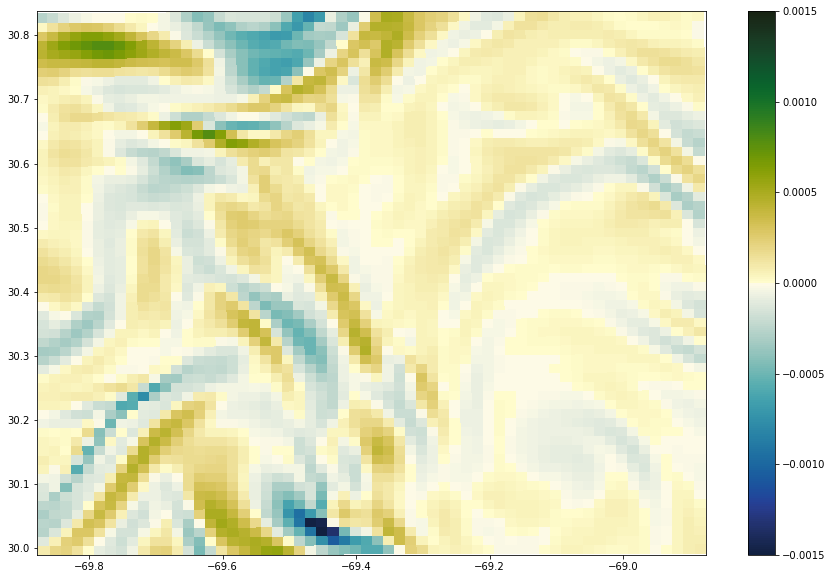

In [53]:
fig, axs = plt.subplots(1,1, figsize=(15, 10))

lat_minibox1 = xr.open_dataset(wfile)['nav_lat'][236:297,695:756]
lon_minibox1 = xr.open_dataset(wfile)['nav_lon'][236:297,695:756]
plt.pcolormesh(lon_minibox1,lat_minibox1,w_minibox1[0,27],vmin=-0.0015,vmax=0.0015,cmap=cmocean.cm.delta)
plt.colorbar()

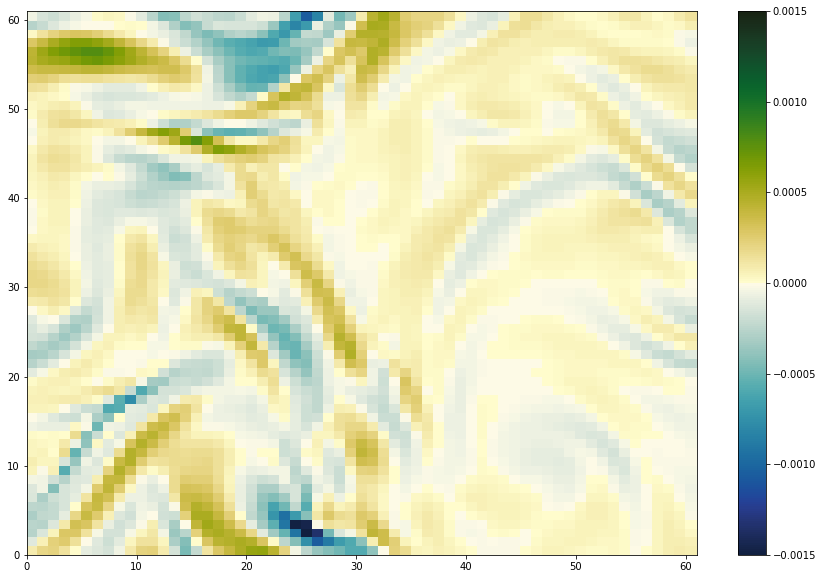

In [54]:
fig, axs = plt.subplots(1,1, figsize=(15, 10))

lat_minibox1 = xr.open_dataset(wfile)['nav_lat'][236:297,695:756]
lon_minibox1 = xr.open_dataset(wfile)['nav_lon'][236:297,695:756]
plt.pcolormesh(w_minibox1[0,27],vmin=-0.0015,vmax=0.0015,cmap=cmocean.cm.delta)
plt.colorbar()

(400, 0)

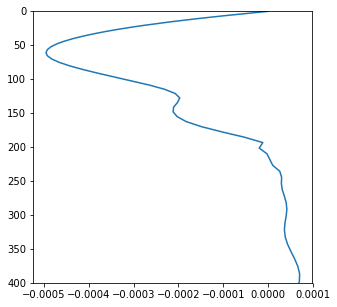

In [61]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.plot(w_minibox1[0,:,4,25],dep)
axs.set_ylim(400,0)

(400, 0)

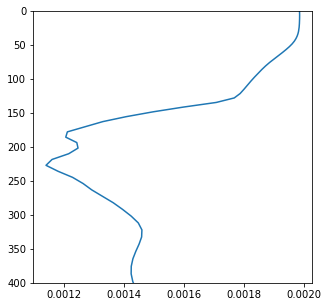

In [62]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.plot(buoy_minibox1[0,:,4,25],dep)
axs.set_ylim(400,0)

In [10]:
print np.nanmin(86400*w_minibox1[0,:])

-163.223878294


In [11]:
print np.nanmax(86400*w_minibox1[0,:])

69.3561315536


In [41]:
print np.nanmean(86400*w_minibox1[0,:])

0.300616668074


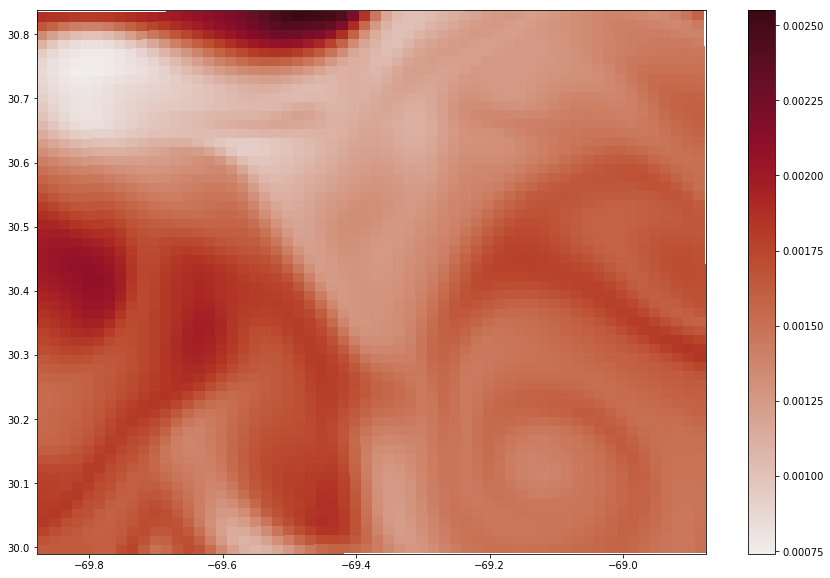

In [47]:
fig, axs = plt.subplots(1,1, figsize=(15, 10))

lat_minibox1 = xr.open_dataset(wfile)['nav_lat'][236:297,695:756]
lon_minibox1 = xr.open_dataset(wfile)['nav_lon'][236:297,695:756]
plt.pcolormesh(lon_minibox1,lat_minibox1,buoy_minibox1[0,27],cmap=cmocean.cm.amp)
plt.colorbar()

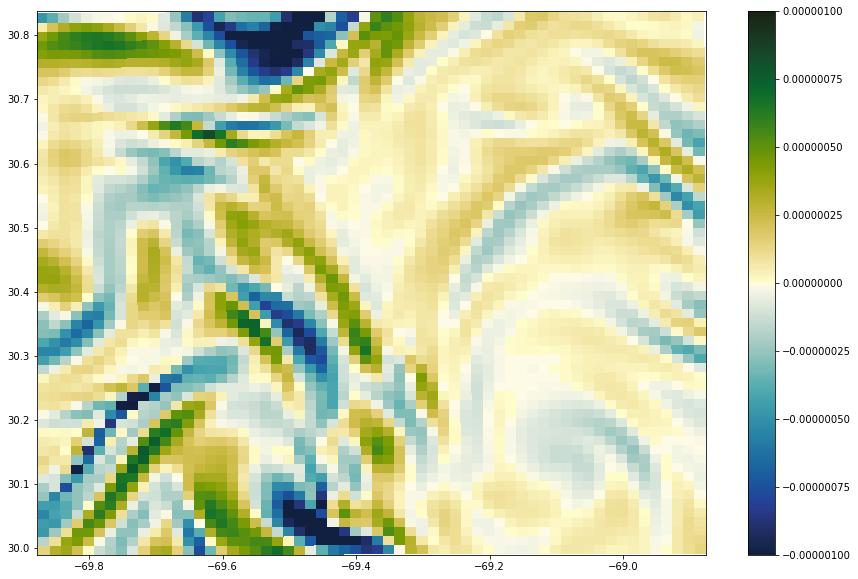

In [36]:
fig, axs = plt.subplots(1,1, figsize=(15, 10))

lat_minibox1 = xr.open_dataset(wfile)['nav_lat'][236:297,695:756]
lon_minibox1 = xr.open_dataset(wfile)['nav_lon'][236:297,695:756]
plt.pcolormesh(lon_minibox1,lat_minibox1,w_minibox1[0,27]*buoy_minibox1[0,27],vmin=-0.000001, vmax=0.000001,cmap=cmocean.cm.delta)
plt.colorbar()

In [38]:
print np.nanmean(w_minibox1[0,27]*buoy_minibox1[0,27])

-1.34506212478e-08


In [39]:
print np.nanmin(w_minibox1[0,27]*buoy_minibox1[0,27])

-3.3259785522e-06


In [40]:
print np.nanmax(w_minibox1[0,27]*buoy_minibox1[0,27])

8.28784403492e-07


In [48]:
wb_avg_minibox1=np.ones(len(dep))
for k in np.arange(len(dep)):
    wb_avg_minibox1[k] = np.nanmean(buoy_minibox1_mask[0,k,:,:])*np.nanmean(w_minibox1_mask[0,k,:,:])


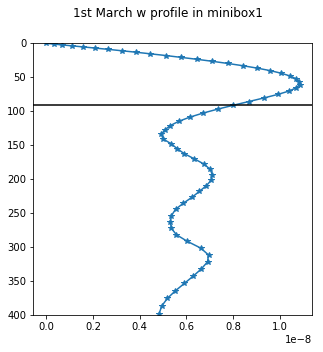

In [49]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.suptitle('1st March w'b' profile in minibox1')

axs.plot(wb_avg_minibox1,dep,'C0*-')
axs.set_ylim(400,0)
axs.axhline(y=avg_mld_minibox1, color='k')